# SIT 720 - Assignment Task 1: Problem solving task.

Student: Thanh (Tim) Nguyen - 218583133

## Import Dependencies

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = './ETTh1.csv'

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Question 1
- Load the data from supplied data file
- Remove the samples where the oil temperature is less than 4
- Print the data dimension before and after

In [4]:
# Load data
data = pd.read_csv(file)

# Original shape
print('Original shape: ', data.shape)

# Filter out the temperature < 4
data = data[data.OT >= 4]

# Filtered shape
print('Filtered shape: ', data.shape)

Original shape:  (17420, 8)
Filtered shape:  (15699, 8)


## Question 2
- Load the data from supplied data file. 
- Display the number of rows and their indices that have missing value in one or more cells. 
- Replace the missing values by the lowest value of the corresponding feature only if the data type is numeric. 
- Print the mean values of all features before and after replacing missing data and explain the reason if they are not same.

In [5]:
data = pd.read_csv(file)
missing = data[data.isnull().any(1)]
display(missing)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17301,21/06/2018 21:00,8.172000,2.009,NaN,0.497,3.046,1.127,8.371
17319,NaN,1.541000,3.014,-0.675,0.888,2.498,1.218,4.643
17328,23/06/2018 0:00,16.476999,6.765,12.117,4.335,NaN,1.249,5.346
17346,23/06/2018 18:00,6.631000,NaN,3.731,1.279,2.833,1.127,8.301
17372,24/06/2018 20:00,8.239000,2.344,NaN,0.995,2.802,0.944,8.864
17384,NaN,3.684000,5.090,-1.457,3.198,5.239,1.919,10.974
17416,26/06/2018 16:00,-5.492000,4.287,-9.132,2.274,NaN,1.675,11.044


In [6]:
data.mean()

/tmp/ipykernel_10291/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


HUFL     7.375141
HULL     2.242217
MUFL     4.300127
MULL     0.881568
LUFL     3.065961
LULL     0.856932
OT      13.324672
dtype: float64

In [7]:
min = data.min()
data = data.fillna(min)

# The cells are fixed like this:
replaced = missing.fillna(min)
display(replaced)

/tmp/ipykernel_10291/1757227276.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min = data.min()


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17301,21/06/2018 21:00,8.172000,2.009,-25.087999,0.497,3.046,1.127,8.371
17319,NaN,1.541000,3.014,-0.675000,0.888,2.498,1.218,4.643
17328,23/06/2018 0:00,16.476999,6.765,12.117000,4.335,-1.188,1.249,5.346
17346,23/06/2018 18:00,6.631000,-4.756,3.731000,1.279,2.833,1.127,8.301
17372,24/06/2018 20:00,8.239000,2.344,-25.087999,0.995,2.802,0.944,8.864
17384,NaN,3.684000,5.090,-1.457000,3.198,5.239,1.919,10.974
17416,26/06/2018 16:00,-5.492000,4.287,-9.132000,2.274,-1.188,1.675,11.044


In [8]:
data.mean()

/tmp/ipykernel_10291/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


HUFL     7.375141
HULL     2.241816
MUFL     4.296753
MULL     0.881568
LUFL     3.065473
LULL     0.856932
OT      13.324672
dtype: float64

Explaination: the method `mean()` calculates the average value for all columns.
For the data with the missing values, it will not use those missing value to calculate.
After filling missing values with the minimum of each column, the `mean()` method would return different values.

We also observed that the mean value is lower after filling, it is because we used the minimum value, which is less than average.

## Question 3
- Continue from [question 2](#question-2). 
- Find the date where oil temperature is more than 20
- Display those observations.

In [9]:
oil_more_than_20 = data[data.OT >= 20]
display(oil_more_than_20)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,1/07/2016 0:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,1/07/2016 1:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,1/07/2016 2:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,1/07/2016 3:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,1/07/2016 4:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
10144,27/08/2017 16:00,-1.072,4.823,-4.868,3.376,3.533,1.157,20.049000
10166,28/08/2017 14:00,-2.880,6.229,-7.960,5.366,4.386,1.279,20.118999
10167,28/08/2017 15:00,-3.215,6.966,-7.569,5.010,4.599,1.218,20.541000
10168,28/08/2017 16:00,0.000,5.023,-4.051,3.376,4.051,1.432,21.597000


## Question 4
- Continue from [question 3](#question-3)
- Which feature(s) having the strongest influence on oil temperature?

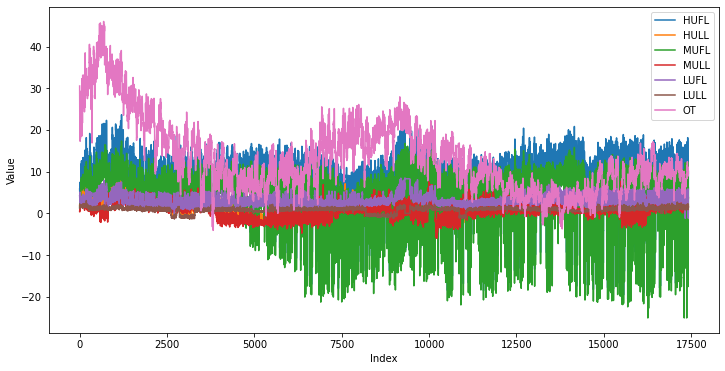

In [10]:
plt.figure(figsize=(12, 6))

for col in data.columns:
    if col == 'date': continue
    plt.plot(data[col], label=col)

plt.ylabel('Value')
plt.xlabel('Index')
plt.legend(loc = 'best')

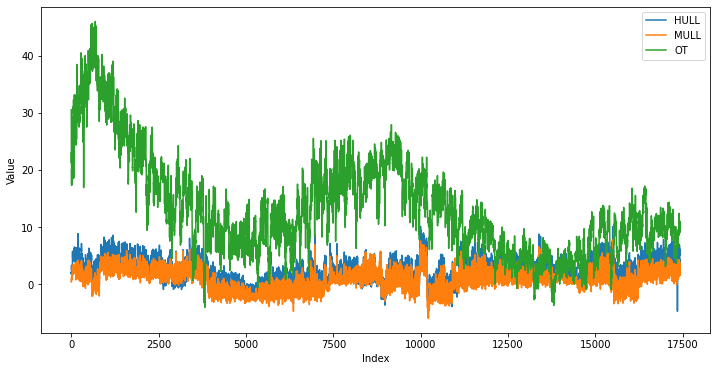

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(data.HULL, label='HULL')
plt.plot(data.MULL, label='MULL')
plt.plot(data.OT, label='OT')

plt.ylabel('Value')
plt.xlabel('Index')
plt.legend(loc = 'best')

The two column `HUFL` and `MUFL` have their values fluctuates  

## Question 5
- Load the data from supplied file
- Print the average value of all numeric features where oil temperature is less than 7 and greater than 4.

In [12]:
data = pd.read_csv(file)

data[(data.OT>4) & (data.OT<7)]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
2883,29/10/2016 3:00,12.793,2.344,9.026,2.985,3.564,-0.579,6.824
2884,29/10/2016 4:00,12.927,2.746,8.813,2.487,3.594,-0.579,5.698
2885,29/10/2016 5:00,13.396,2.947,9.381,2.914,3.807,-0.548,4.995
2886,29/10/2016 6:00,12.860,2.344,8.884,2.452,4.173,-0.487,4.854
2887,29/10/2016 7:00,16.343,3.952,11.442,3.340,4.995,-0.457,6.824
...,...,...,...,...,...,...,...,...
17353,24/06/2018 1:00,14.334,5.090,10.163,3.305,4.538,1.401,6.613
17354,24/06/2018 2:00,15.673,6.162,11.798,4.158,4.142,1.157,6.402
17355,24/06/2018 3:00,14.669,5.827,9.950,3.696,4.386,1.401,6.542
17356,24/06/2018 4:00,14.133,5.626,9.737,3.482,4.477,1.310,6.964


## Question 6
Display the number of observations that satisfies following conditions:
1. OT value is within the range between 10 and 25
2. HUFL is positive
3. 4 < MUFL < 11

In [13]:
data[(data.OT>10) & (data.OT<25) & (data.HUFL>0) & (data.MUFL>4) & (data.MUFL<11)]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
34,2/07/2016 10:00,9.913,4.957,6.645,3.305,3.046,1.553,20.962999
35,2/07/2016 11:00,11.788,5.425,8.173,2.523,3.686,1.675,19.416000
36,2/07/2016 12:00,9.645,4.957,6.752,2.132,3.107,1.828,20.823000
37,2/07/2016 13:00,10.382,5.760,7.462,2.559,2.985,1.767,20.190001
38,2/07/2016 14:00,8.774,4.689,6.112,2.025,2.894,1.919,21.315001
...,...,...,...,...,...,...,...,...
17229,18/06/2018 21:00,12.927,3.885,9.381,1.741,3.746,1.097,10.200000
17230,18/06/2018 22:00,12.056,4.086,8.635,2.132,3.442,1.249,10.130000
17231,18/06/2018 23:00,13.329,4.555,7.782,1.670,5.483,1.614,10.271000
17394,25/06/2018 18:00,8.841,3.550,5.366,1.777,3.472,1.310,11.185000


## Question 7
- Print the average of HULL for observations, which has OT value between -5 and 10. 
- Is this higher than HULL average calculated using the complete dataset?

In [14]:
observations = data[(data.OT>-5) & (data.OT<10)]

avg_HULL = observations.HULL.mean()
avg_HULL_observations = observations.HULL.mean()

print('Average of HULL for -5 < OT < 10: ', avg_HULL_observations)

if (avg_HULL_observations > avg_HULL):
    print('Average of HULL for -5 < OT < 10 is greater than average of HULL for completed dataset: ', avg_HULL)
elif (avg_HULL_observations < avg_HULL):
    print('Average of HULL for -5 < OT < 10 is less than average of HULL for completed dataset: ', avg_HULL)
else:
    print('Average of HULL for -5 < OT < 10 is equal to average of HULL for completed dataset: ', avg_HULL)

Average of HULL for -5 < OT < 10:  2.080304795419493
Average of HULL for -5 < OT < 10 is equal to average of HULL for completed dataset:  2.080304795419493


## Question 8 *
- Create and print data frame where OT values are in the range from 1 to 40 with an interval of 5 (Ex. 1-5,
6-10..., 36-40).

In [15]:
data = pd.read_csv(file)




## Question 9 *
- Continue from [question 8](#question-8). 
- For each group display the minimum and maximum of all the features except Date and OT.

## Question 10
- Create data frames containing observations recorded in the date range either between January and June or between July and December for individual year (ex: 2016, 2017..etc). 
- This means there will be two data frames for each year as long as there is one observation that falls in either January-June or July-December date range. 
- Store the data frames in separate CSV file named ‘year_monthStart_monthEnd.csv’ in the same directory of your code file, where value of ‘month_Start’ is either January or July and value of ‘monthEnd’ is either June or December based on the date range of the corresponding data frame.


In [16]:
data = pd.read_csv(file)

# Convert string to date
data.date = pd.to_datetime(data.date)

for year in [2016, 2017, 2018]:
    split_year_first = data[(data.date > str(year)) & (data.date < '01/07/'+str(year))]
    split_year_first.to_csv(f'{str(year)}_jan_jun.csv')

    split_year_second = data[(data.date >= '01/07/'+str(year)) & (data.date < str(year+1))]
    split_year_second.to_csv(f'{str(year)}_jul_dec.csv')

## Question 11
- Visualise variations of OT values with respect to other features (one at a time) except ‘date’. 
- Explain your findings briefly.

## Question 12
- Draw a pie chart summarising number of observations per year.

In [17]:
data = pd.read_csv(file)

data.date = pd.to_datetime(data.date)

num_observation = []
years = [2016, 2017, 2018]

for year in years:
    split_year = data[(data.date >= str(year)) & (data.date < '01/01/'+str(year+1))]
    num_observation.append(len(split_year))

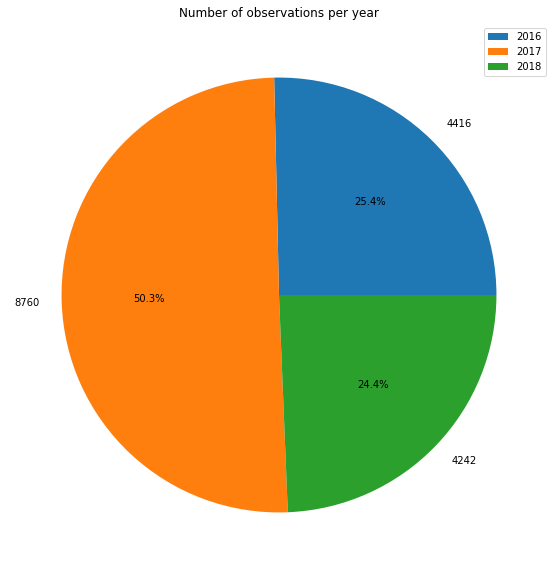

In [18]:
plt.figure(figsize=(10,10))

plt.pie(num_observation, labels=num_observation, autopct='%1.1f%%')
plt.title('Number of observations per year')
plt.legend(years, loc='best')

## Question 13
- Create histogram of OT values and explain the graph.

(array([  88.,  246., 1013., 2076., 2189., 2695., 1941., 1519., 1475.,
        1297.,  882.,  493.,  285.,  284.,  319.,  258.,  174.,  123.,
          37.,   26.]),
 array([-4.07999992, -1.57564993,  0.92870007,  3.43305006,  5.93740005,
         8.44175005, 10.94610004, 13.45045004, 15.95480003, 18.45915003,
        20.96350002, 23.46785002, 25.97220001, 28.47655001, 30.9809    ,
        33.48525   , 35.98959999, 38.49394999, 40.99829998, 43.50264998,
        46.00699997]),
 <BarContainer object of 20 artists>)

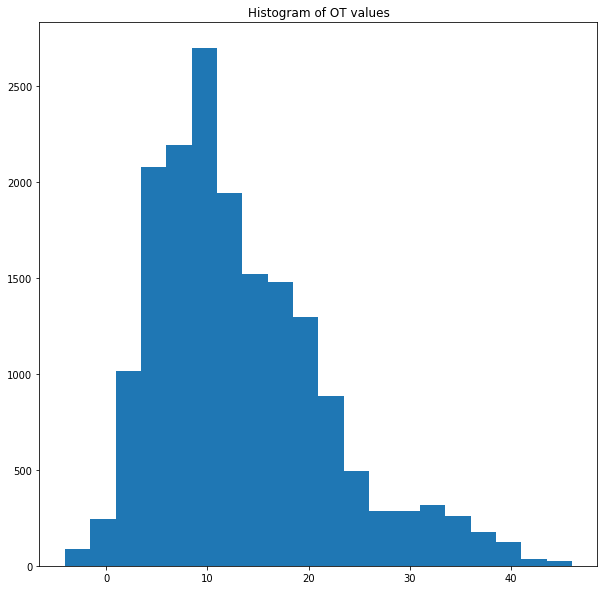

In [19]:
data = pd.read_csv(file)

plt.figure(figsize=(10,10))
plt.title('Histogram of OT values')
plt.hist(data.OT, bins=20)

Histogram shows the distribution of value in a dataset.
The type of data being measured is represented on the horizontal axis, and the vertical axis represents how many observations are in each bin.

In this case, we can see the most common value of the column `OT` in the dataset.
From the shape of the histogram plot, we can see that the `OT` data is right-skewed.

## Question 14
- Load the data from supplied data file. 
- Add three more columns titled `HUFL_HULL`, `MUFL_MULL`, `LUFL_LULL` where, `HUFL_HULL = (HUFL + HULL) / 2`, `MUFL_MULL = (MUFL + MULL) / 2`, and `LUFL_LULL = (LUFL + LULL) / 2`. 
- Save the updated data frame to a csv file named ‘Average_data.csv’ in the same directory of your code file.

In [20]:
data = pd.read_csv(file)

# Calculate three columns
HUFL_HULL = (data.HUFL + data.HULL) / 2
MUFL_MULL = (data.MUFL + data.MULL) / 2
LUFL_LULL = (data.LUFL + data.LULL) / 2

# Add the columns to the dataframe
data['HUFL_HULL'] = HUFL_HULL
data['MUFL_MULL'] = MUFL_MULL
data['LUFL_LULL'] = LUFL_LULL

In [21]:
# Export to csv
data.to_csv('./Average_data.csv')

## Question 15
- Continue from question 14. 
- Drop the row where any of the newly added features value is null.
- Finally, display the filtered observations and save to a csv file named ‘Average_clean_data.csv’ in the same directory of your code file.

In [22]:
clean_null = data.dropna(axis = 0, how = 'any')

display(clean_null)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,HUFL_HULL,MUFL_MULL,LUFL_LULL
0,1/07/2016 0:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,3.9180,1.0305,2.7715
1,1/07/2016 1:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,3.8845,0.9590,2.7565
2,1/07/2016 2:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,3.4490,0.8170,2.4975
3,1/07/2016 3:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,3.5160,0.8350,2.5430
4,1/07/2016 4:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,3.6500,0.9770,2.5735
...,...,...,...,...,...,...,...,...,...,...,...
17414,26/06/2018 14:00,-1.273,3.617,-4.904,2.132,3.320,1.432,10.200000,1.1720,-1.3860,2.3760
17415,26/06/2018 15:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000,0.9380,-1.7415,2.4975
17417,26/06/2018 17:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000,3.3155,0.6400,2.6195
17418,26/06/2018 18:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000,6.5305,3.7845,2.5435


In [23]:
clean_null.to_csv('./Average_clean_data.csv')